In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

In [ ]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Part 1: Basic understanding of data

## Trends over months and years

Why I did this:
> Lead levels can vary seasonally due to temperature, water stagnentation and treatment changes, from Elen Botenzo's feedback.

> Understanding monthly and yearly fluctuations.

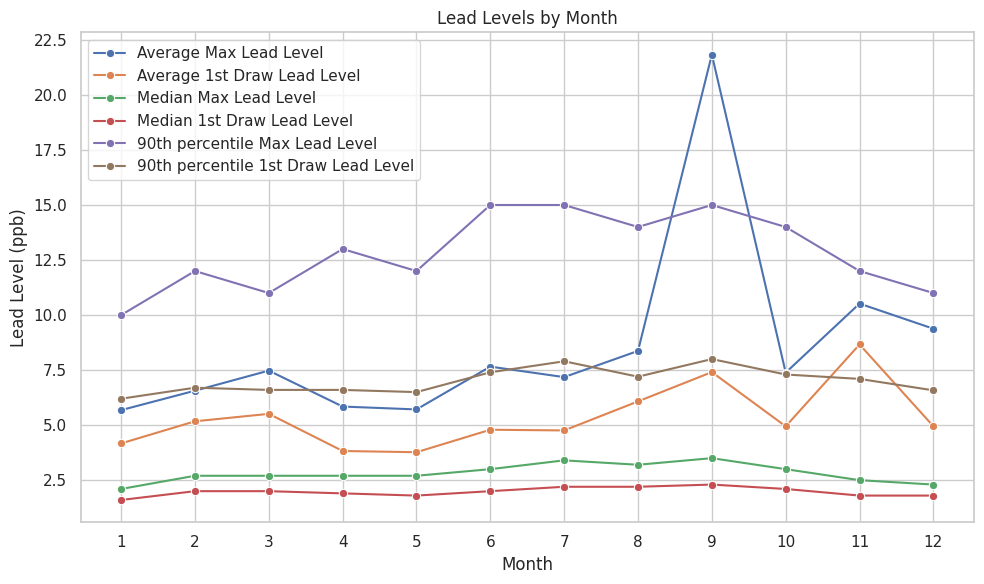

In [ ]:
# Extracted time features from sample dates: month, year, day
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Day'] = df['Sample Date'].dt.day

sns.set(style="whitegrid")

# Grouped data by month to analyze trends across a calendar year.
monthly_avg = df.groupby('Month')[['1st Draw', 'Max']].mean().reset_index()
monthly_med = df.groupby('Month')[['1st Draw', 'Max']].median().reset_index()
monthly_90th = df.groupby('Month')[['1st Draw', 'Max']].quantile(0.9).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Max', marker='o', label='Average Max Lead Level')
sns.lineplot(data=monthly_avg, x='Month', y='1st Draw', marker='o', label='Average 1st Draw Lead Level')
sns.lineplot(data=monthly_med, x='Month', y='Max', marker='o', label='Median Max Lead Level')
sns.lineplot(data=monthly_med, x='Month', y='1st Draw', marker='o', label='Median 1st Draw Lead Level')
sns.lineplot(data=monthly_90th, x='Month', y='Max', marker='o', label='90th percentile Max Lead Level')
sns.lineplot(data=monthly_90th, x='Month', y='1st Draw', marker='o', label='90th percentile 1st Draw Lead Level')
plt.title("Lead Levels by Month")
plt.xlabel("Month")
plt.ylabel("Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()

The above graph shows that we have outliers(the mean curves are more erratic) in our data, and we need to consider median for more accurate predictions

## Year-Over-Year Trends by Month

Why:

> We want to detect whether lead levels are improving or worsening over time during the same months.

What I did:

> Grouped by both year and month, then calculated:

>> Mean of Max lead level per group

>> Median of Max lead level per group

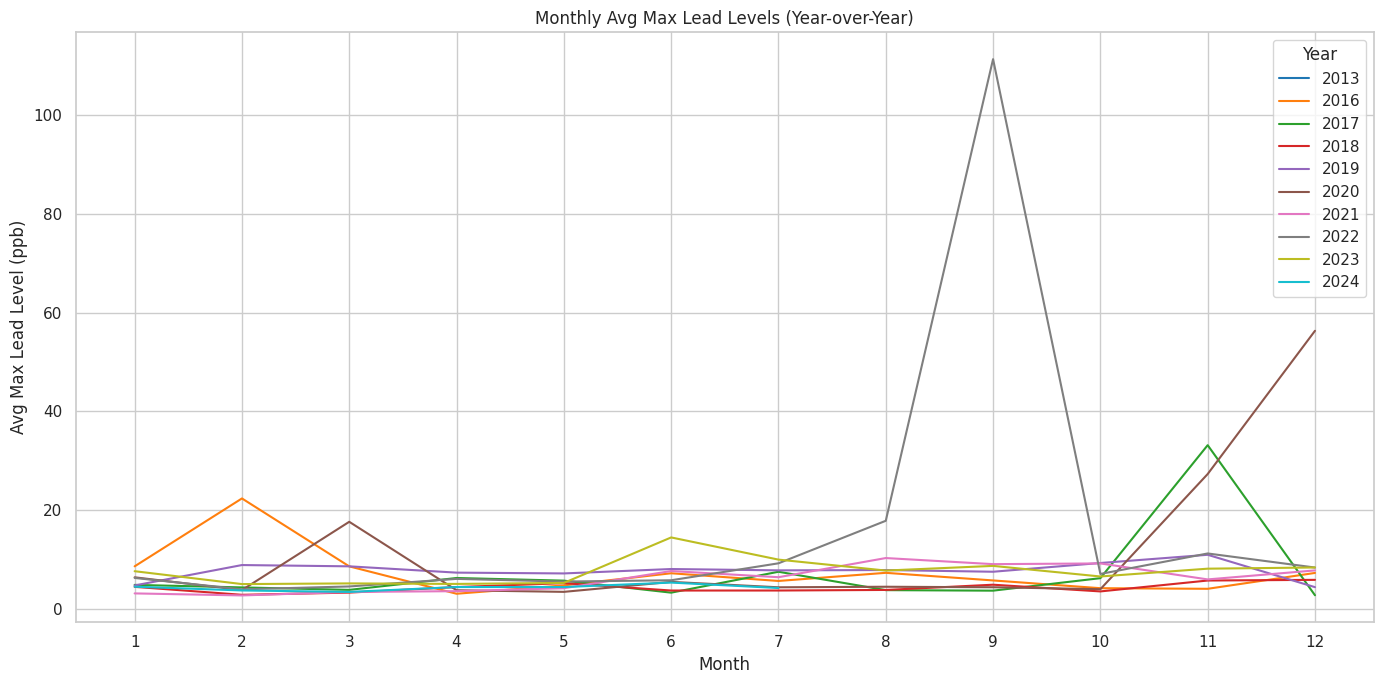

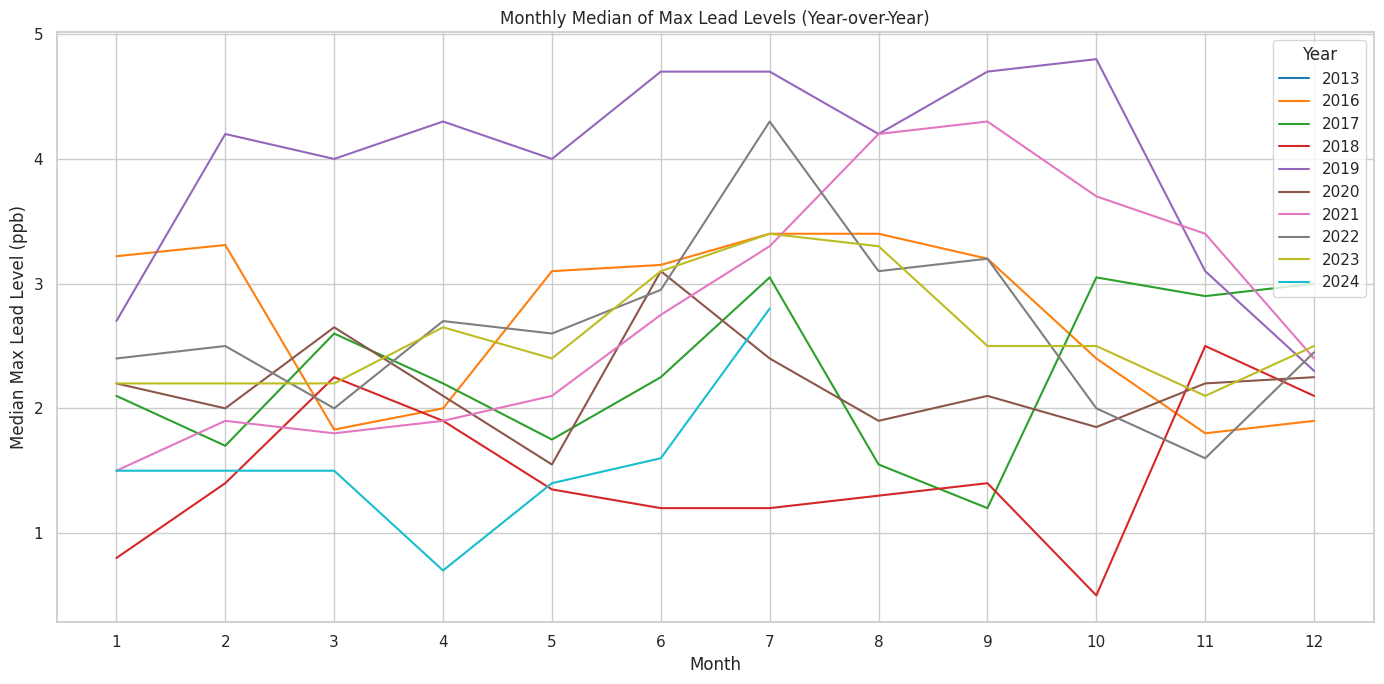

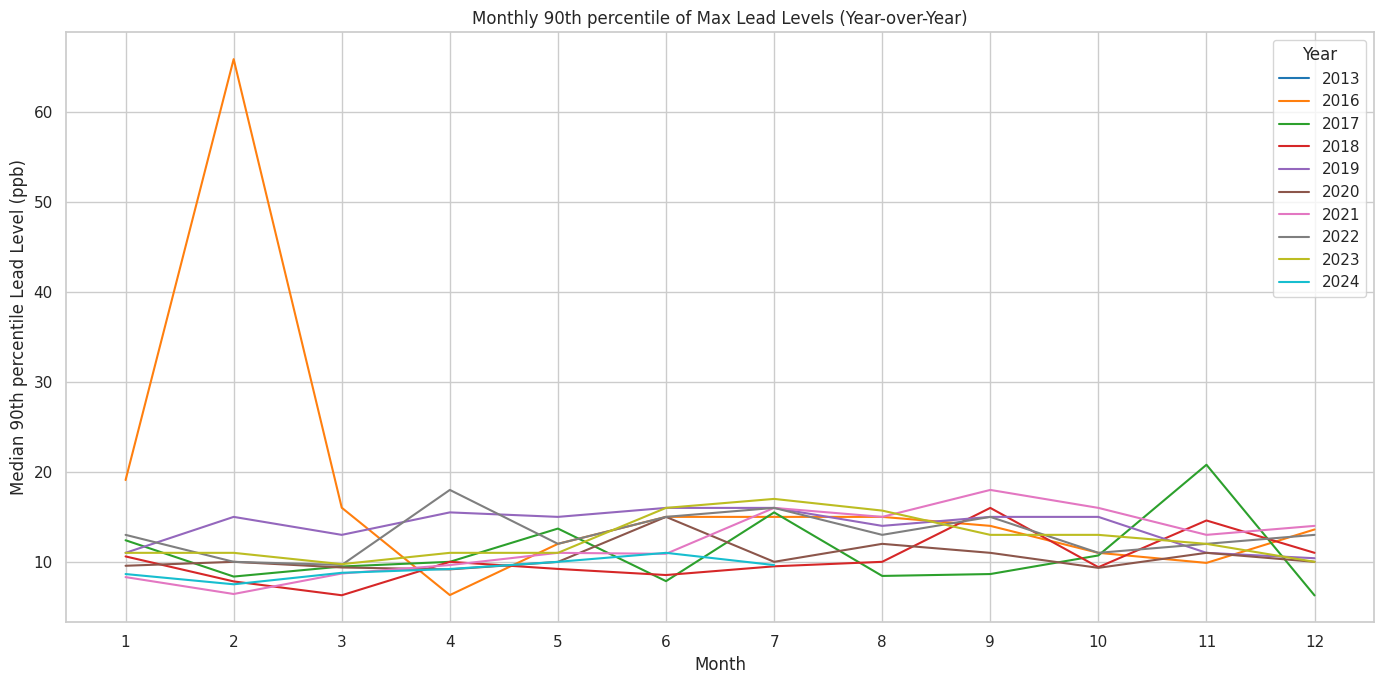

In [ ]:
monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].mean().reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly Avg Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

print('')

monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].median().reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly Median of Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Median Max Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

print('')

monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].quantile(0.9).reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly 90th percentile of Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Median 90th percentile Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

## Analysis with Neighborhoods, ZIPs, and Wards

Why:
> Lead contamination can be dependent on infrastructure age, service line material and socioeconomic factors.

> This grouping helps target high risk areas.

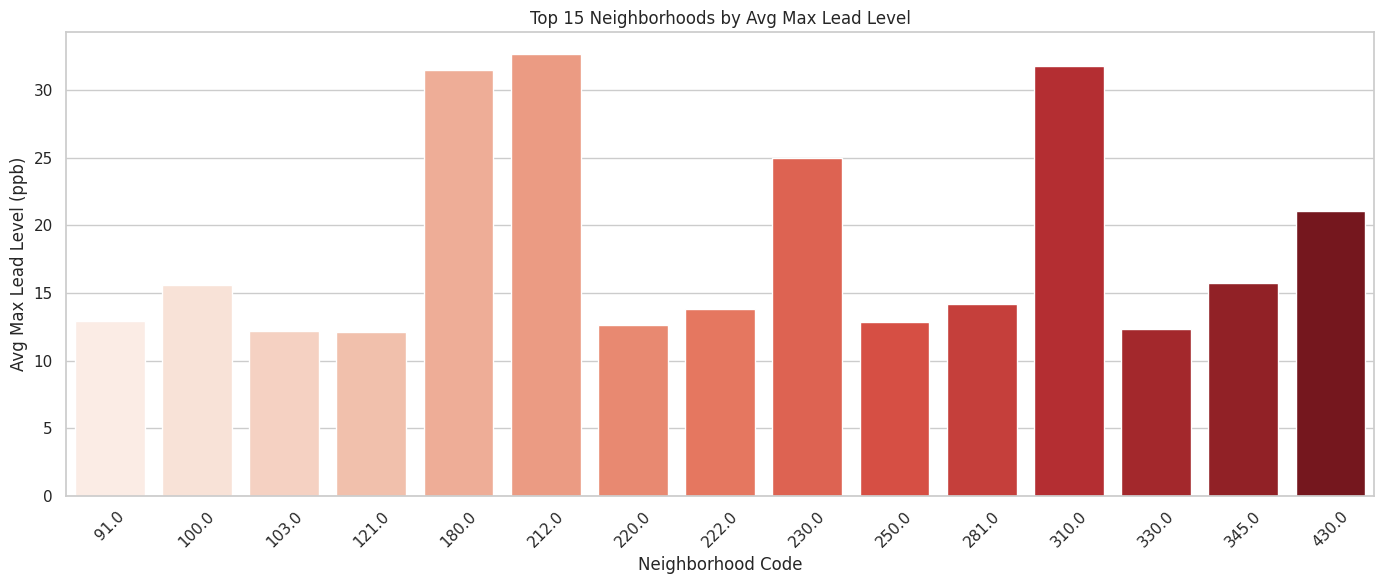

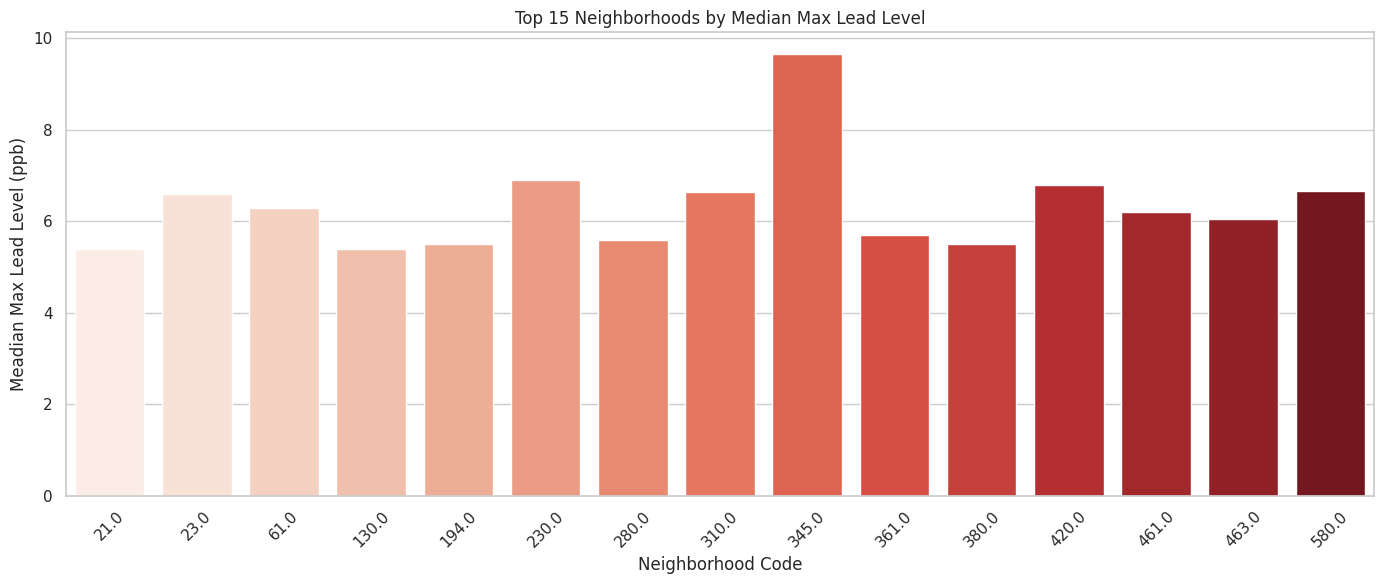

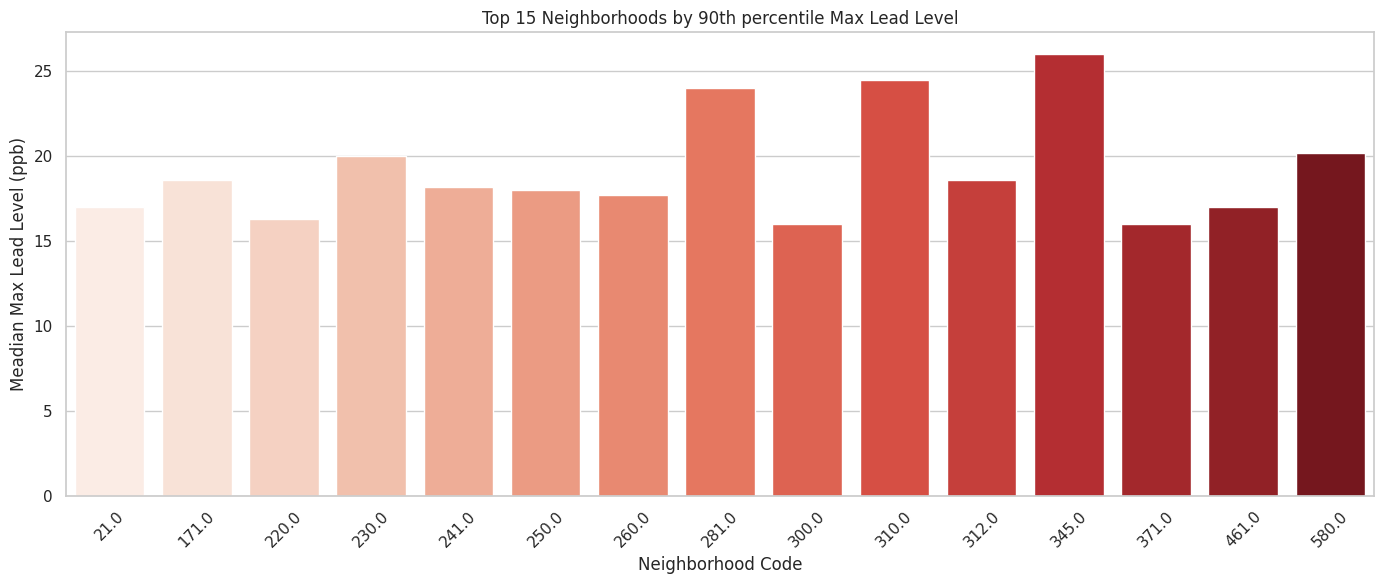

In [ ]:
# Group by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by Avg Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MEadian by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by Median Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Meadian Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 90th percentile by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by 90th percentile Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Meadian Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

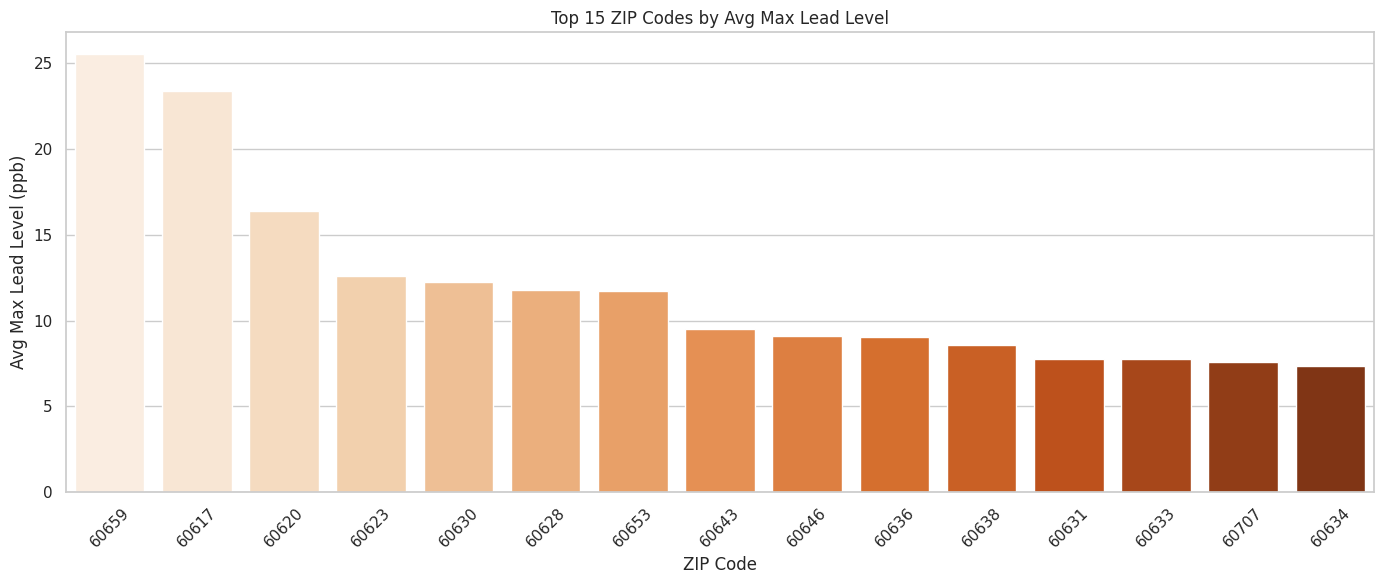

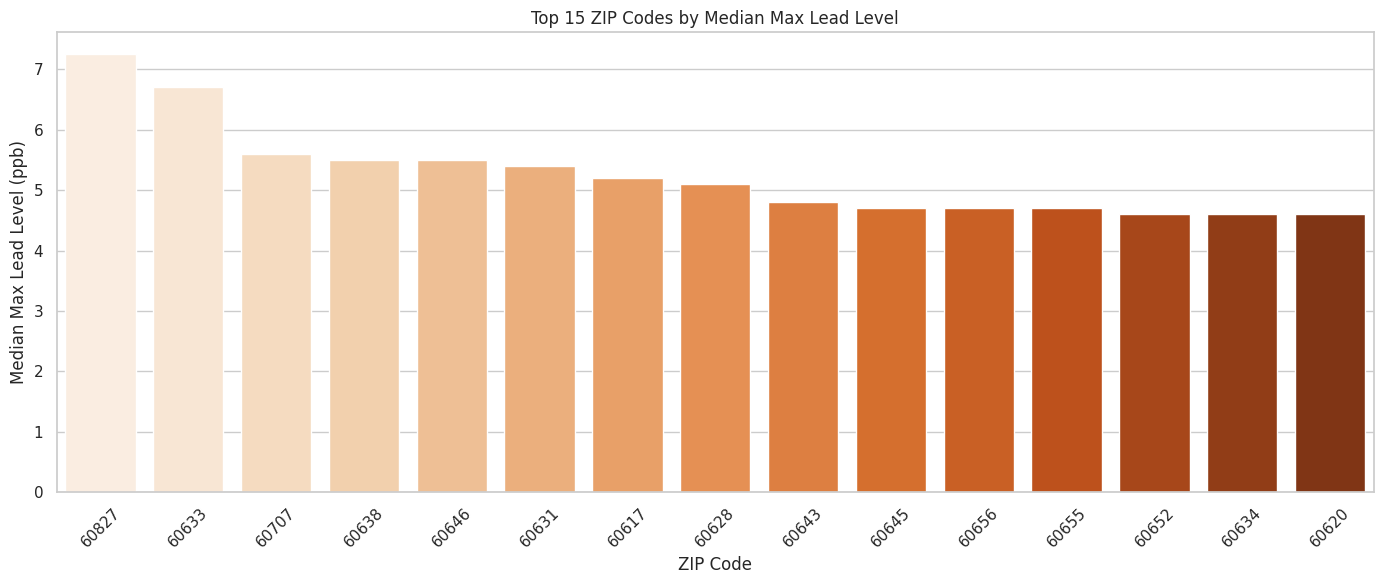

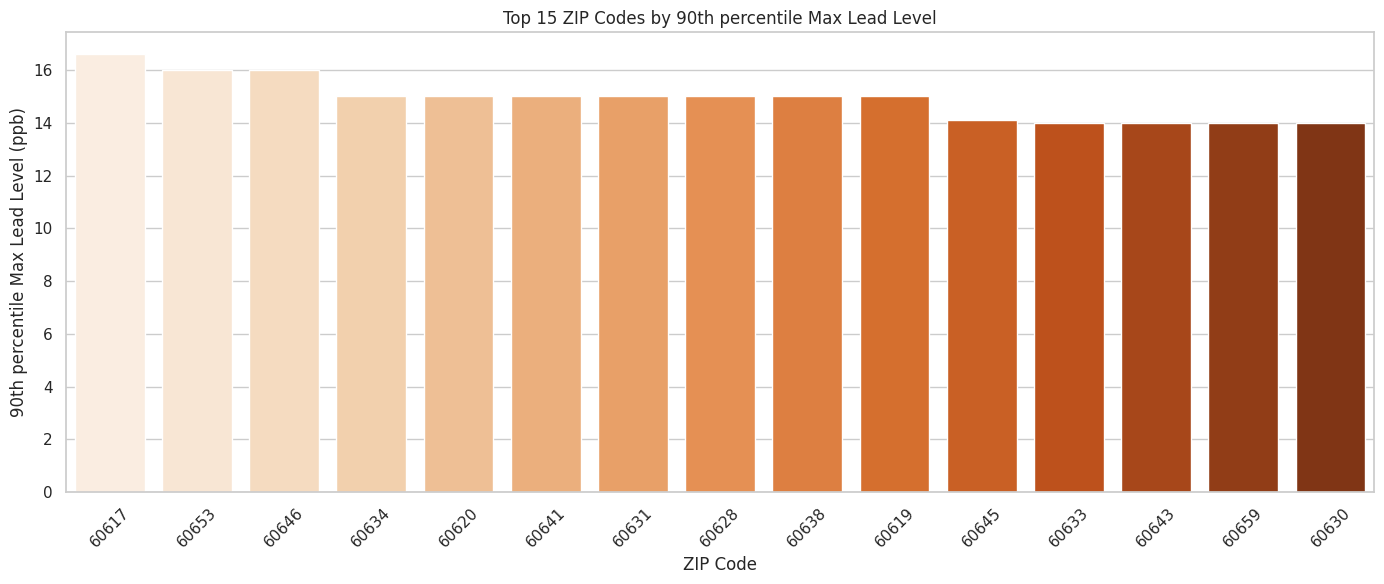

In [ ]:
# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by Avg Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by Median Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("Median Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by 90th percentile Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("90th percentile Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

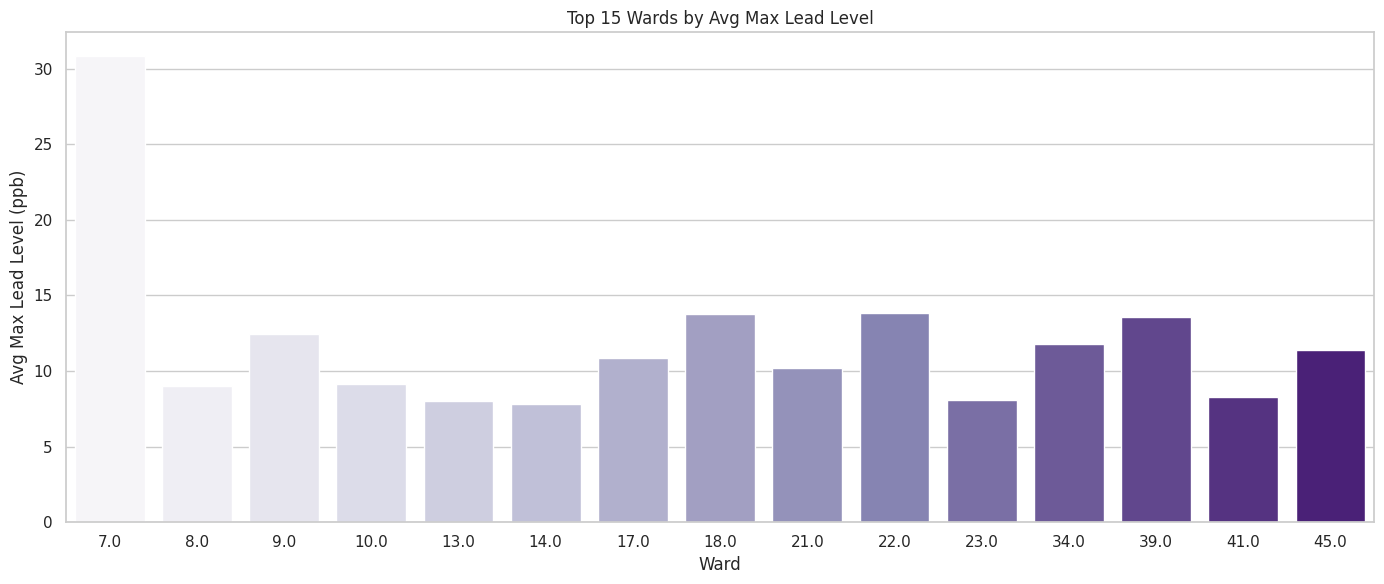

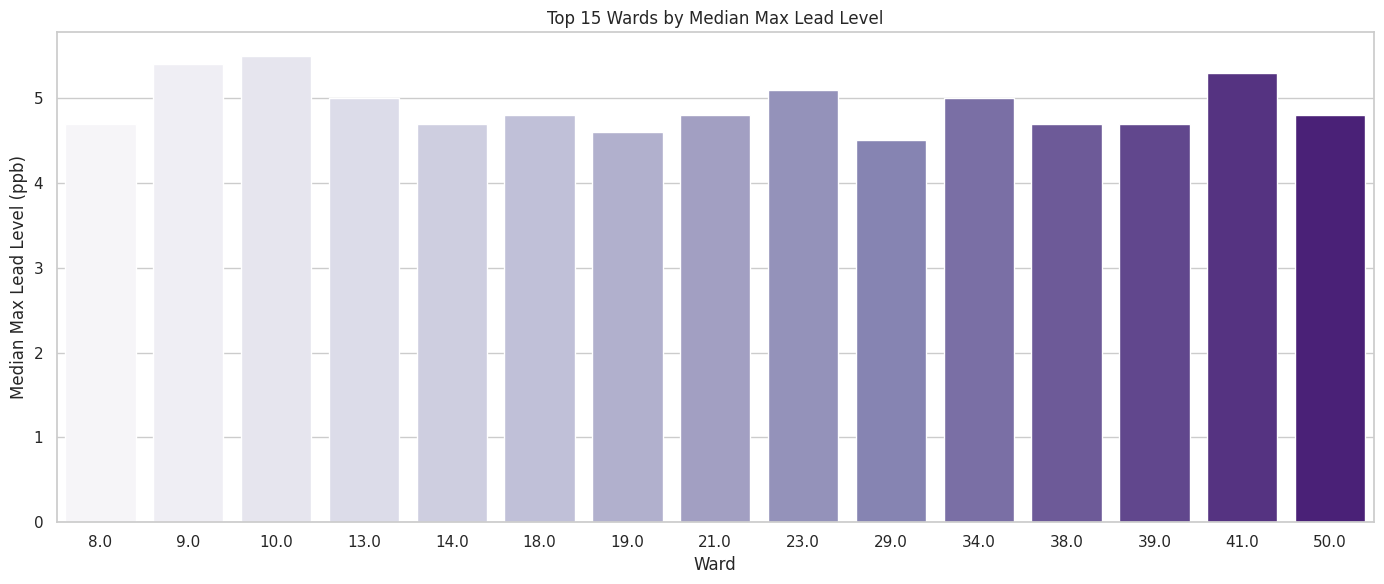

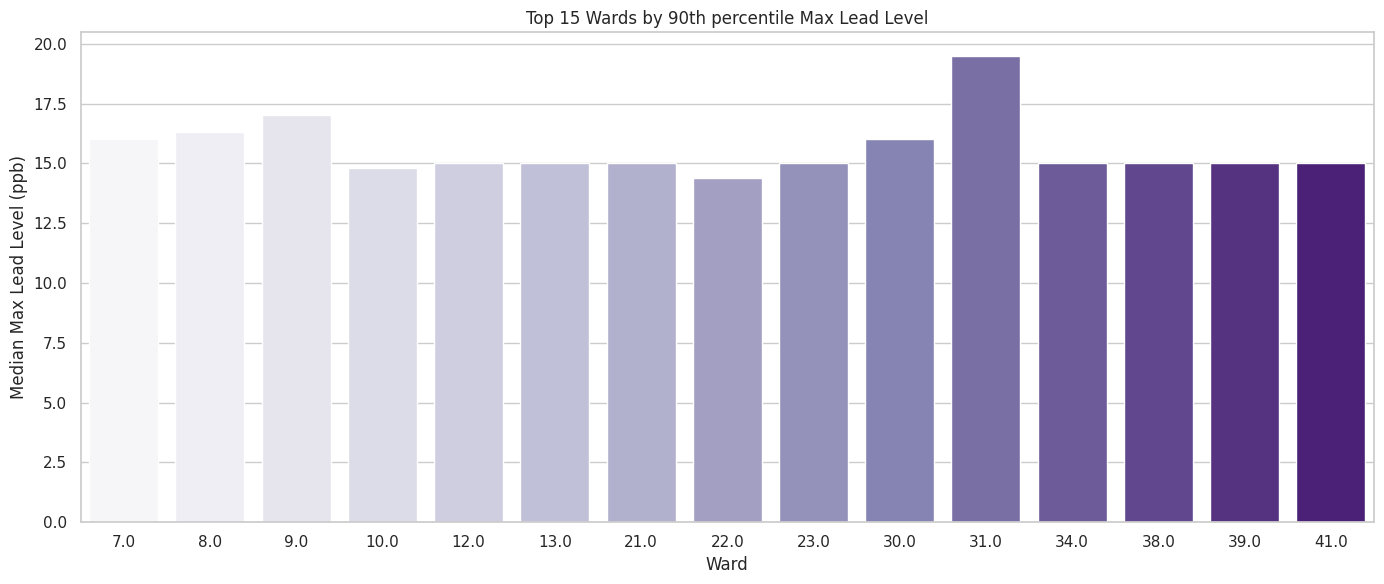

In [ ]:
ward_avg = df.groupby('ward')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by Avg Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.tight_layout()
plt.show()


ward_avg = df.groupby('ward')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by Median Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Median Max Lead Level (ppb)")
plt.tight_layout()
plt.show()

ward_avg = df.groupby('ward')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by 90th percentile Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Median Max Lead Level (ppb)")
plt.tight_layout()
plt.show()

# Part 2:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

## Temporal Trend Analysis (Median by Time)

What I did:
 > I shaded June to September every year to see if lead levels increase in summer (a hypothesis based on possible water stagnation due to heat).

 Key takeaway:
 > Lead levels fluctuate, but not strongly in sync with summer. Although I can see the levels rising in atleast half of the summers

In [ ]:
# 1. Fix datatypes
df['Sample Date'] = pd.to_datetime(df['Sample Date'])
df['property_zip'] = df['property_zip'].astype(str)
df['Property Class'] = df['Property Class'].astype(str)
df['Town Code'] = df['Town Code'].astype(str)

# Convert numerical columns to floats where applicable
numerical_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max', 'Land Square Feet', 'Building Square Feet', 'Repair Condition']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# 2. Handle missing values
# Impute or drop based on the column context
df['1st Draw'].fillna(df['1st Draw'].median(), inplace=True)  # Median imputation for lead levels
# df.dropna(subset=['Longitude', 'Latitude'], inplace=True)  # Drop rows with missing lat/long

# Group by `year_month` and plot average trends for each lead metric
df['year_month'] = df['Sample Date'].dt.to_period('M')

# Calculate the median of lead metrics per year_month
lead_metrics = ['1st Draw', '2/3 Min', '5 Min', 'Max']
avg_trends = df.groupby('year_month')[lead_metrics].median()

df['year'] = df['Sample Date'].dt.year
df['month'] = df['Sample Date'].dt.month
def get_chicago_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

df['season'] = df['month'].apply(get_chicago_season)

df['is_summer'] = df['month'].isin([6, 7, 8, 9])

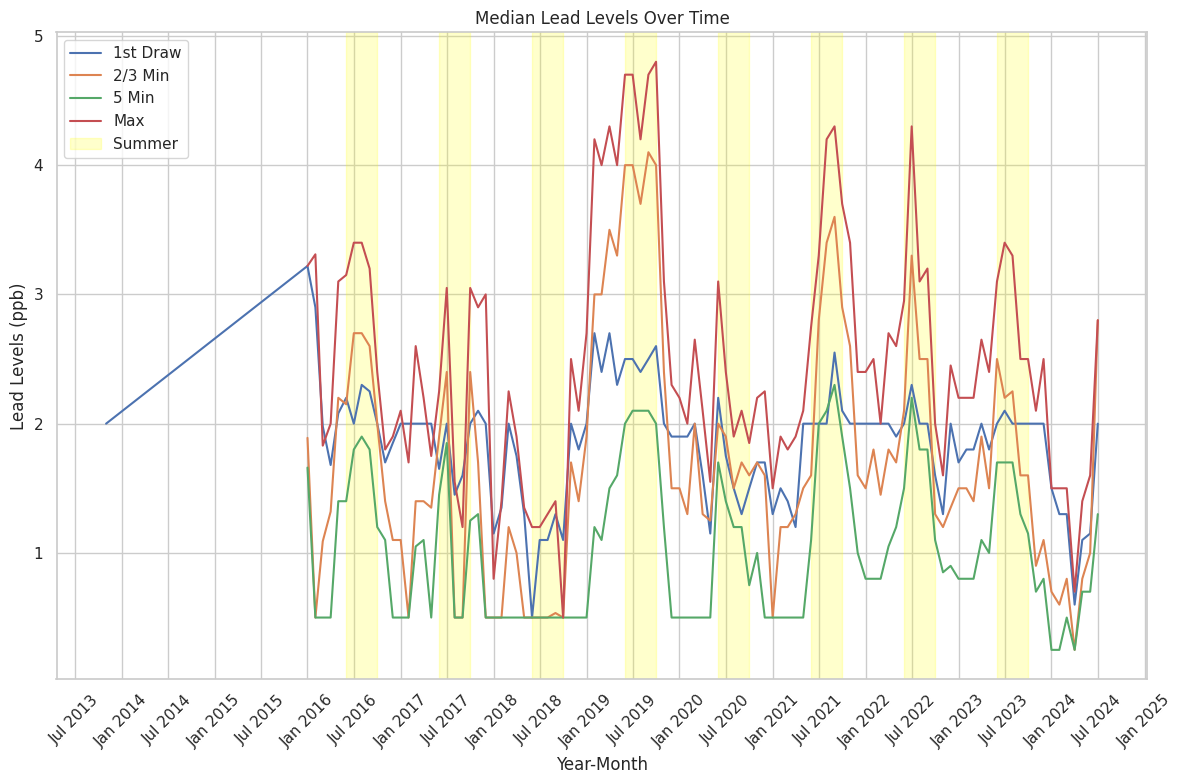

In [ ]:
import matplotlib.dates as mdates

# Convert PeriodIndex to datetime
avg_trends.index = avg_trends.index.to_timestamp()

plt.figure(figsize=(12, 8))
for metric in lead_metrics:
    plt.plot(avg_trends.index, avg_trends[metric], label=metric)

# Dynamically add summer shading
for year in range(2016, 2024):
    start = pd.to_datetime(f"{year}-06-01")
    end = pd.to_datetime(f"{year}-09-30")
    plt.axvspan(start, end, color='yellow', alpha=0.2, label='Summer' if year == 2018 else "")

plt.title('Median Lead Levels Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Lead Levels (ppb)')

# Format x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Mean, Median, Std for Each Season
seasonal_stats = df.groupby('season')[lead_metrics].agg(['mean', 'median', 'std'])
print("Seasonal Statistics (Mean, Median, Std):\n", seasonal_stats)

Seasonal Statistics (Mean, Median, Std):
         1st Draw                      2/3 Min                         5 Min  \
            mean median         std      mean median         std       mean   
season                                                                        
Fall    5.768491    2.0  114.232919  6.915704    2.6  152.232183  10.329546   
Spring  4.210476    2.0   43.357168  4.268334    2.0   13.768451   2.067003   
Summer  5.090470    2.0   49.582414  5.077832    2.5   26.271539   2.954940   
Winter  5.745934    2.0   75.221976  4.721937    1.6   79.555595   2.259716   

                                 Max                     
       median         std       mean median         std  
season                                                   
Fall      1.7  642.216459  14.828578    3.3  642.994619  
Spring    1.1    7.914902   6.303617    2.7   45.295174  
Summer    1.7   10.202180   7.768839    3.2   56.122925  
Winter    0.7   54.226390   8.276874    2.4  108.710684 

## Statistics Tests:

### T-Test:

> Do 1st Draw and Max lead levels in summer months (Jun–Sep) differ significantly from other months?

Test used:
> Two-sample independent t-test
>> Assumes approximately normal distribution  
>> Compares means between two groups

Results:

> p-values > 0.05 → Not significant
> Cohen’s d < 0.2 → Negligible effect size

Interpretation:
> There is no statistical evidence that summer differs from non-summer in lead levels.

In [ ]:
# Statistical Tests
# 1. T-test: Summer vs Non-Summer for 1st Draw and Max
summer_data = df[df['is_summer'] == 1]
non_summer_data = df[df['is_summer'] == 0]

t_test_1st_draw = stats.ttest_ind(summer_data['1st Draw'].dropna(), non_summer_data['1st Draw'].dropna())
t_test_max = stats.ttest_ind(summer_data['Max'].dropna(), non_summer_data['Max'].dropna())

print(f"T-test for 1st Draw (Summer vs Non-Summer): p-value = {t_test_1st_draw.pvalue:.4f}")
print(f"T-test for Max (Summer vs Non-Summer): p-value = {t_test_max.pvalue:.4f}")

T-test for 1st Draw (Summer vs Non-Summer): p-value = 0.4003
T-test for Max (Summer vs Non-Summer): p-value = 0.1900


## ANOVA for across all seasons

Do 1st Draw levels differ across all four seasons?

Test used:
> One-way ANOVA

Tests if at least one group mean is significantly different
Assumes normality & homogeneity of variance

Results:
> p ≈ 0.424 → Not statistically significant

Interpretation:
> No seasonal pattern in lead levels strong enough to reject the null.

In [ ]:
# 2. ANOVA for Lead Levels by Season (1st Draw)
anova_1st_draw = stats.f_oneway(
    df[df['season'] == 'Winter']['1st Draw'].dropna(),
    df[df['season'] == 'Spring']['1st Draw'].dropna(),
    df[df['season'] == 'Summer']['1st Draw'].dropna(),
    df[df['season'] == 'Fall']['1st Draw'].dropna()
)

print(f"ANOVA for 1st Draw (Seasons): p-value = {anova_1st_draw.pvalue:.4f}")

# Result: p = 0.424 → Not statistically significant.
# Interpretation: No strong evidence that seasons impact 1st Draw levels.

ANOVA for 1st Draw (Seasons): p-value = 0.3614


In [ ]:
# Effect Size for t-test and ANOVA
# Cohen's d for t-test (Summer vs Non-Summer)
cohen_d_1st_draw = (summer_data['1st Draw'].mean() - non_summer_data['1st Draw'].mean()) / np.sqrt((summer_data['1st Draw'].std()**2 + non_summer_data['1st Draw'].std()**2) / 2)
cohen_d_max = (summer_data['Max'].mean() - non_summer_data['Max'].mean()) / np.sqrt((summer_data['Max'].std()**2 + non_summer_data['Max'].std()**2) / 2)

print(f"Cohen's d for 1st Draw (Summer vs Non-Summer): {cohen_d_1st_draw:.4f}")
print(f"Cohen's d for Max (Summer vs Non-Summer): {cohen_d_max:.4f}")

Cohen's d for 1st Draw (Summer vs Non-Summer): 0.0079
Cohen's d for Max (Summer vs Non-Summer): 0.0118


<0.2, Even if the difference was statistically significant, the actual magnitude of difference is too small to matter.

> There’s no strong statistical evidence that summer months have higher (or lower) lead levels compared to other times of the year.

> Lead levels do not fluctuate significantly based on season — there’s no strong seasonal pattern in the data.

## spearman corr(Lead vs. Proxy Variables)

Why Spearman?

> Non-parametric (doesn't assume normality)
> Measures monotonic relationships (can be nonlinear)

We correlated:

> Lead metrics (like 1st Draw)
> Against numeric stagnation proxies (Age, Rooms, Square Feet, etc.)

What we found:
> Some variables (e.g., Age, Total Building Square Feet) show weak to moderate correlation with lead metrics.

> Most correlation values < ±0.3 → so not very strong, but worth exploring further.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# Step 4: Correlations between numeric proxies and lead metrics
proxy_vars_numeric = ['Age', 'Apartments', 'Land Square Feet', 'Building Square Feet',
                      'Total Building Square Feet', 'Rooms', 'Bedrooms']

lead_metrics = ['1st Draw', '2/3 Min', '5 Min', 'Max']

correlations = {}
for metric in lead_metrics:
    for var in proxy_vars_numeric:
        if var in df.columns and df[var].dtype in [np.float64, np.int64]:
            corr, _ = spearmanr(df[metric], df[var], nan_policy='omit')
            correlations[(var, metric)] = round(corr, 3)

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Spearman Corr'])
correlation_df = correlation_df.reset_index()
correlation_df.columns = ['(Variable, Metric)', 'Spearman Corr']
display(correlation_df.sort_values(by='Spearman Corr', key=abs, ascending=False))

# A negative correlation (ρ < 0) means higher values of that variable are associated with lower lead.
# A positive correlation (ρ > 0) means higher values are associated with higher lead.
# Stronger correlation = value closer to -1 or +1

,"(Variable, Metric)",Spearman Corr
10,"(Building Square Feet, 2/3 Min)",-0.256
24,"(Building Square Feet, Max)",-0.254
12,"(Rooms, 2/3 Min)",-0.238
4,"(Total Building Square Feet, 1st Draw)",-0.236
26,"(Rooms, Max)",-0.235
3,"(Building Square Feet, 1st Draw)",-0.215
8,"(Apartments, 2/3 Min)",-0.215
25,"(Total Building Square Feet, Max)",-0.212
22,"(Apartments, Max)",-0.207
13,"(Bedrooms, 2/3 Min)",-0.201


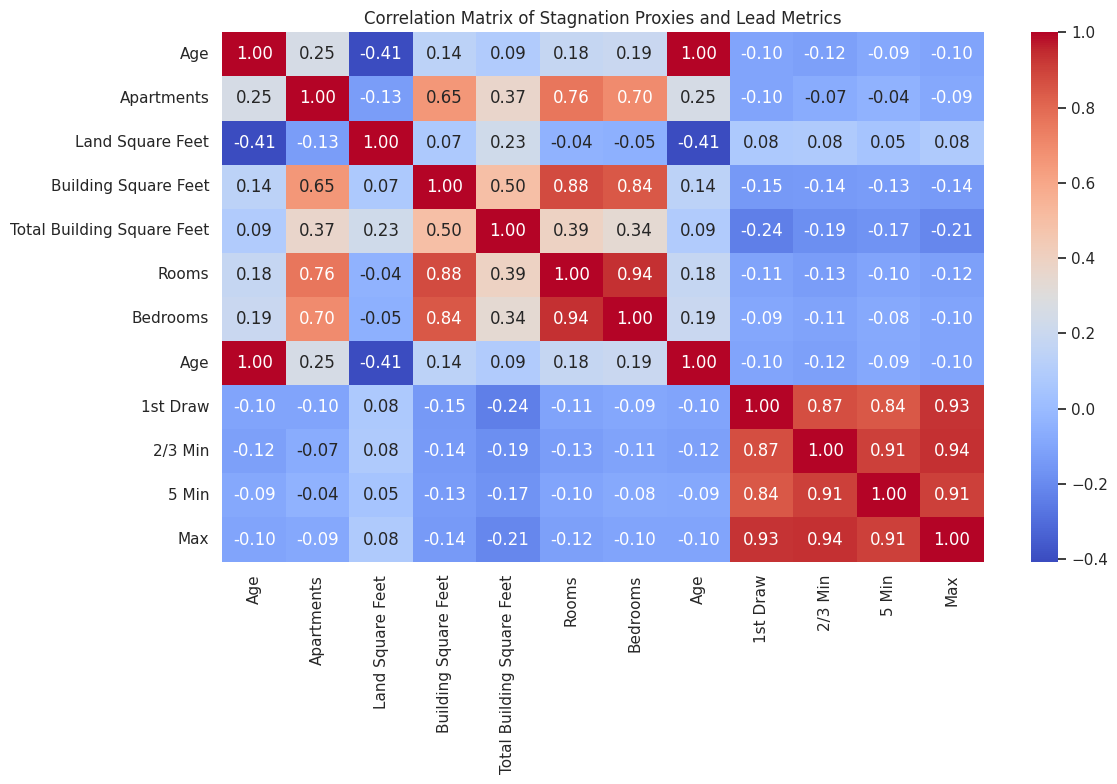

In [ ]:
# Step 7: Correlation heatmap with all stagnation proxy vars and lead metrics
selected_vars = proxy_vars_numeric + ['Age'] + lead_metrics
df_corr = df[selected_vars].dropna()

plt.figure(figsize=(12, 8))
corr_matrix = df_corr.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Stagnation Proxies and Lead Metrics")
plt.tight_layout()
plt.show()


In [ ]:
# Step 8: Summary of strong candidate features
threshold = 0.2  # adjust as needed
strong_signals = correlation_df[correlation_df['Spearman Corr'].abs() > threshold]
print("Strong candidate stagnation proxy features based on correlation:\n")
display(strong_signals)

Strong candidate stagnation proxy features based on correlation:



,"(Variable, Metric)",Spearman Corr
3,"(Building Square Feet, 1st Draw)",-0.215
4,"(Total Building Square Feet, 1st Draw)",-0.236
8,"(Apartments, 2/3 Min)",-0.215
10,"(Building Square Feet, 2/3 Min)",-0.256
12,"(Rooms, 2/3 Min)",-0.238
13,"(Bedrooms, 2/3 Min)",-0.201
22,"(Apartments, Max)",-0.207
24,"(Building Square Feet, Max)",-0.254
25,"(Total Building Square Feet, Max)",-0.212
26,"(Rooms, Max)",-0.235


## TS01

We're analyzing the monthly average of maximum lead levels in water samples over time using time series analysis techniques.

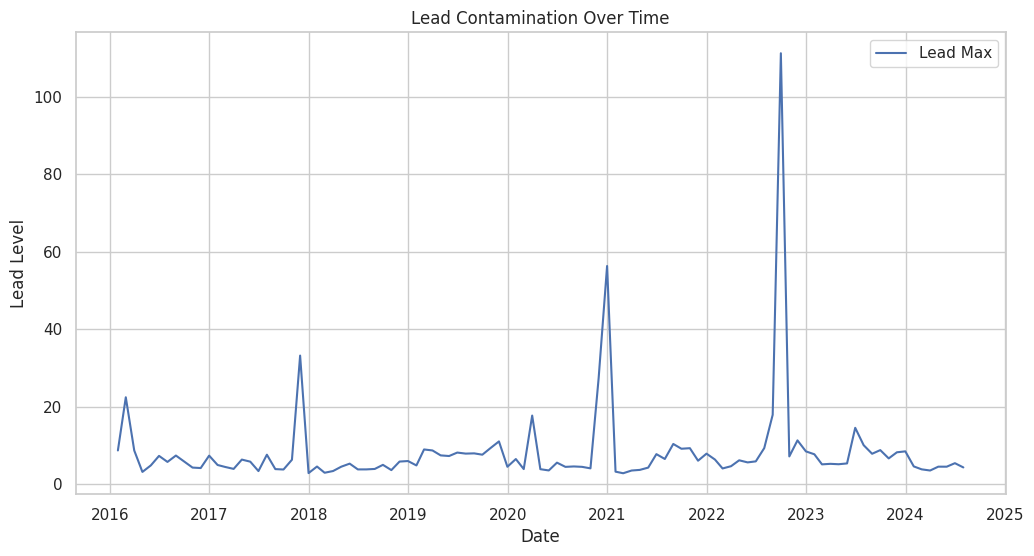

In [ ]:
# Read the CSV file with dtype specified to avoid mixed types issue
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv', dtype={'Sample Date': str})

# Convert 'Sample Date' to datetime format
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

# Handle missing values in columns related to lead levels (1st Draw, 2/3 Min, 5 Min, Max)
# Convert columns to numeric (this will convert non-numeric values to NaN)
df[['1st Draw', '2/3 Min', '5 Min', 'Max']] = df[['1st Draw', '2/3 Min', '5 Min', 'Max']].apply(pd.to_numeric, errors='coerce')


# This is just to clean up column names and make them easier to reference in code.
df = df.rename(columns={
    '1st Draw': 'lead_1st_draw',
    '2/3 Min': 'lead_2_3_min',
    '5 Min': 'lead_5_min',
    'Max': 'lead_max'
})


# Set 'Sample Date' as index
df.set_index('Sample Date', inplace=True)

# Resample by month (you can also use 'W' for weekly resampling)
df_monthly = df.resample('M').agg({
    'lead_1st_draw': 'mean',
    'lead_2_3_min': 'mean',
    'lead_5_min': 'mean',
    'lead_max': 'mean'
})

# Handle duplicates by collapsing them (if necessary)
# This may involve aggregating by address or neighborhood
df_monthly = df_monthly.groupby(df_monthly.index).mean()


# I'm visualizing the average monthly max lead levels over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['lead_max'], label='Lead Max')  #  plotting the monthly average of the maximum lead levels over time.
plt.title('Lead Contamination Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()


Key Observations:
> Some months show extreme jumps

> No long-term upward/downward trend

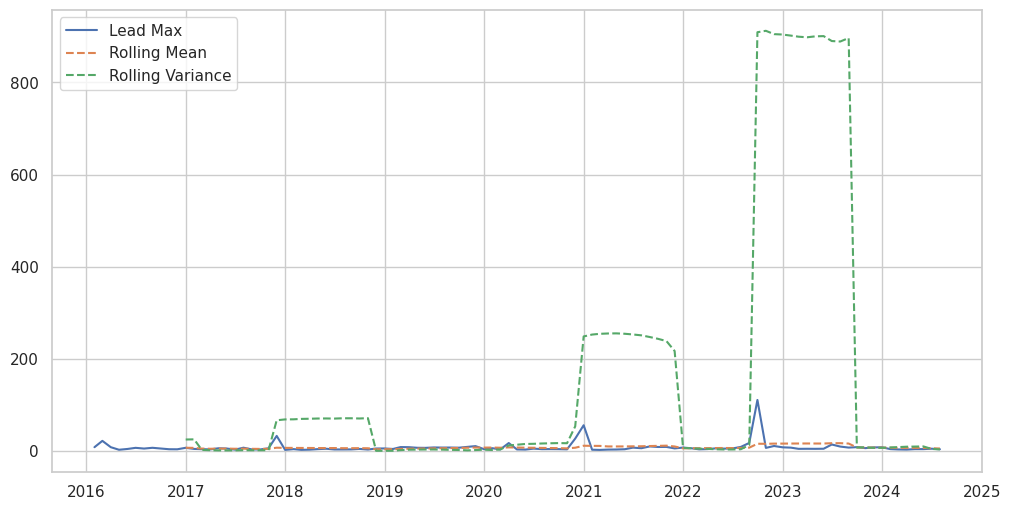

In [ ]:
# Plot rolling mean and variance
# Drop rows with missing values
df_monthly = df_monthly.dropna(subset=['lead_max'])

rolling_mean = df_monthly['lead_max'].rolling(window=12).mean()
rolling_variance = df_monthly['lead_max'].rolling(window=12).var()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['lead_max'], label='Lead Max')
plt.plot(df_monthly.index, rolling_mean, label='Rolling Mean', linestyle='--')
plt.plot(df_monthly.index, rolling_variance, label='Rolling Variance', linestyle='--')
plt.legend()
plt.show()

# Rolling Mean not changing much → no trend

# Rolling Variance changes → volatility in some years (especially near spikes)

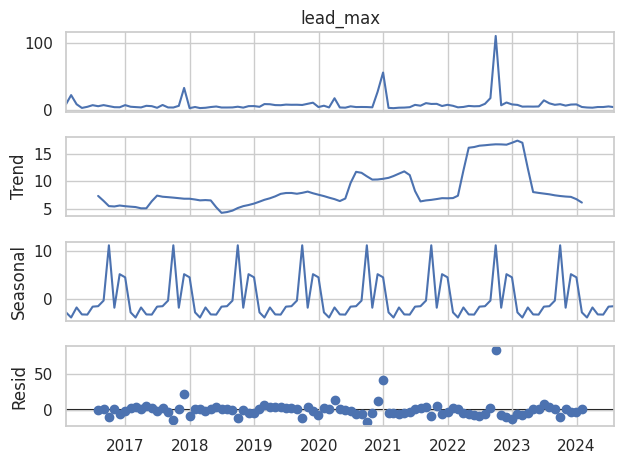

In [ ]:
# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_monthly['lead_max'], model='additive', period=12)
result.plot()
plt.show()

# Observed: Original data
# Trend: Underlying slow-moving average
# Seasonal:kinda pattern
# Residual: Random noise/spikes

In [ ]:
# Augmented Dickey-Fuller  to check for stationarity
from statsmodels.tsa.stattools import adfuller

# Null hypothesis is that the series is stationary
adf_result = adfuller(df_monthly['lead_max'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# p-value < 0.05 → reject null hypothesis → the data is stationary
# That means: No trend. Seasonality is there, but the structure isn’t drifting.

ADF Statistic: -8.808967988948229
p-value: 2.015502076311383e-14


<Figure size 1200x600 with 0 Axes>

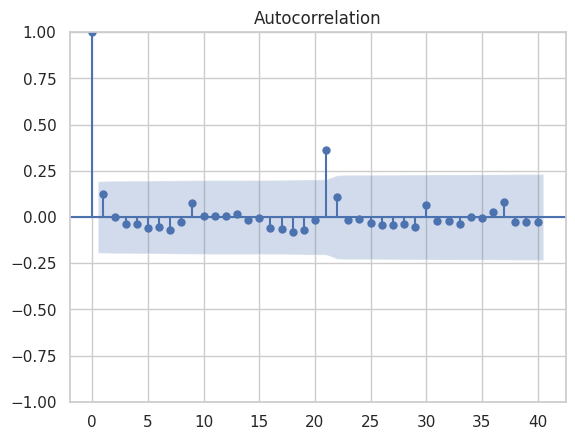

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_monthly['lead_max'], lags=40)
plt.show()

# ACF: peaks at lags 0, 1, 9,21,22,29,37, etc. → yearly seasonality

<Figure size 1200x600 with 0 Axes>

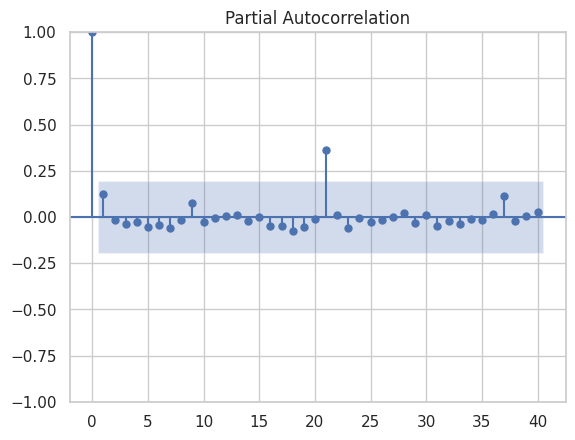

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(df_monthly['lead_max'], lags=40)
plt.show()
# PACF: Helps decide AR terms (lags) to use in the model, peaks at lags 1, 2, 9, 21, 37

## Part 3: Calender based seasonal trends in lead levels

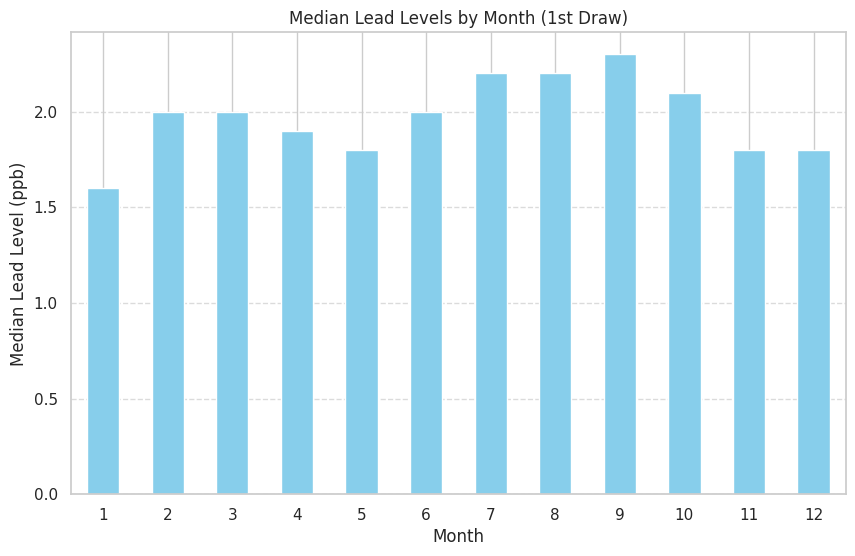

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract month and year from sample date
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year

# Calculate median lead levels by month
monthly_median = df.groupby('Month')['1st Draw'].median()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
monthly_median.plot(kind='bar', color='skyblue')
plt.title('Median Lead Levels by Month (1st Draw)')
plt.xlabel('Month')
plt.ylabel('Median Lead Level (ppb)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gradual Increase from 5 to 9, then decrease from 9 to 1

Why
> To prepare the data for seasonal trend analysis.

> Helps us compare lead levels across different seasons, which can reveal environmental effects (like pipe corrosion due to temperature or water usage patterns).

In [ ]:
# prompt: df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
# df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
# df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed
# # Extract time components
# df['Month'] = df['Sample Date'].dt.month
# df['Year'] = df['Sample Date'].dt.year
# df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')
# # Convert lead columns to numeric
# lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
# for col in lead_cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
# # Median lead levels by month
# monthly_medians = df.groupby('Month')[lead_cols].median()
# print(monthly_medians)
# # Median lead levels by season
# seasonal_medians = df.groupby('Season')[lead_cols].median()
# print(seasonal_medians)
# Make the above code for the 90th percentile of all the differnet lead_cols instead of the median

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed
# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')
# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# 90th percentile lead levels by month
monthly_90th = df.groupby('Month')[lead_cols].quantile(0.9)
print(monthly_90th)
# 90th percentile lead levels by season
seasonal_90th = df.groupby('Season')[lead_cols].quantile(0.9)
seasonal_90th


       1st Draw  2/3 Min  5 Min   Max
Month                                
1          6.20      8.1    3.0  10.0
2          6.70      8.7    3.2  12.0
3          6.60      9.1    3.4  11.0
4          6.60     11.0    4.0  13.0
5          6.50     10.0    4.8  12.0
6          7.40     11.0    5.6  15.0
7          7.90     12.0    6.0  15.0
8          7.20     12.0    6.1  14.0
9          8.00     13.0    6.6  15.0
10         7.30     12.0    5.7  14.0
11         7.10     10.0    4.1  12.0
12         6.58      9.1    3.8  11.0


,1st Draw,2/3 Min,5 Min,Max
Season,,,,
Cold,6.8,10.0,4.1,12.0
Warm,7.4,12.0,5.9,14.0


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')

# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Median lead levels by month
monthly_medians = df.groupby('Month')[lead_cols].median()
print(monthly_medians)

# Median lead levels by season
seasonal_medians = df.groupby('Season')[lead_cols].median()
print(seasonal_medians)

       1st Draw  2/3 Min  5 Min  Max
Month                               
1           1.6      1.2    0.5  2.1
2           2.0      1.7    0.6  2.7
3           2.0      1.9    0.8  2.7
4           1.9      2.0    1.1  2.7
5           1.8      2.0    1.2  2.7
6           2.0      2.3    1.5  3.0
7           2.2      2.7    1.8  3.4
8           2.2      2.6    1.8  3.2
9           2.3      2.7    1.8  3.5
10          2.1      2.4    1.5  3.0
11          1.8      1.7    1.1  2.5
12          1.8      1.4    0.6  2.3
        1st Draw  2/3 Min  5 Min  Max
Season                               
Cold         1.9      1.8    1.0  2.6
Warm         2.1      2.5    1.6  3.2


In [ ]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [6, 7, 8, 9] else 'Cold')

# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Median lead levels by month
monthly_medians = df.groupby('Month')[lead_cols].mean()
print(monthly_medians)

# Median lead levels by season
seasonal_medians = df.groupby('Season')[lead_cols].mean()
print(seasonal_medians)

       1st Draw   2/3 Min      5 Min        Max
Month                                          
1      4.169805  3.378449   1.508135   5.681356
2      5.174270  3.382382   1.542268   6.563880
3      5.512456  4.129071   1.832157   7.476250
4      3.825598  4.466494   2.108320   5.843766
5      3.769448  4.170219   2.244721   5.713358
6      4.791282  5.292882   3.068127   7.657380
7      4.758783  5.155711   2.919218   7.181074
8      6.078307  4.851624   2.903764   8.370757
9      7.409592  8.705800  17.576010  21.831355
10     4.946231  5.012813   2.626484   7.384557
11     8.663733  4.867964   2.037497  10.520722
12     4.947590  7.226195   4.063894   9.379635
        1st Draw   2/3 Min     5 Min        Max
Season                                         
Cold    5.198305  4.583465  2.235578   7.366690
Warm    5.778689  5.937776  6.420166  11.101686


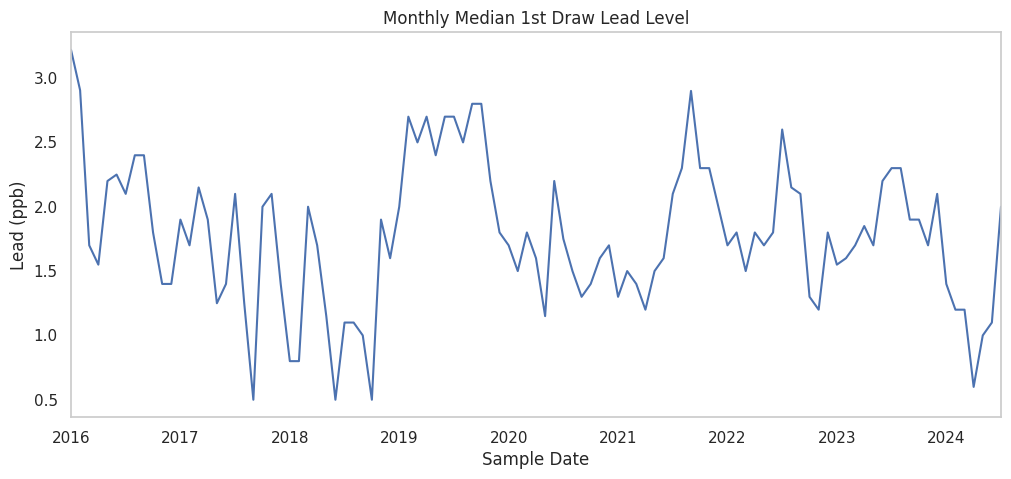

In [ ]:
# Monthly median aggregation for 1st Draw
monthly_df = df.set_index('Sample Date').resample('M')['1st Draw'].median().dropna()

# Quick plot to visualize trend
import matplotlib.pyplot as plt

monthly_df.plot(title='Monthly Median 1st Draw Lead Level', ylabel='Lead (ppb)', figsize=(12, 5))
plt.grid()
plt.show()

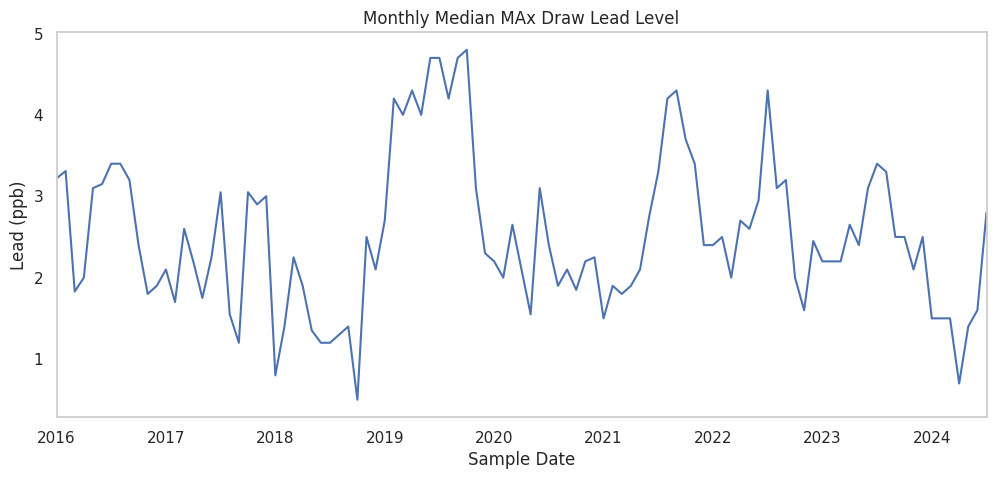

In [ ]:
# Monthly median aggregation for 1st Draw
monthly_df = df.set_index('Sample Date').resample('M')['Max'].median().dropna()

# Quick plot to visualize trend
import matplotlib.pyplot as plt

monthly_df.plot(title='Monthly Median MAx Draw Lead Level', ylabel='Lead (ppb)', figsize=(12, 5))
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')  # p-value less than 0.001 and ADF = -4,1, stationarity confirmed

ADF Statistic: -4.09791897982136
p-value: 0.0009762240818394352


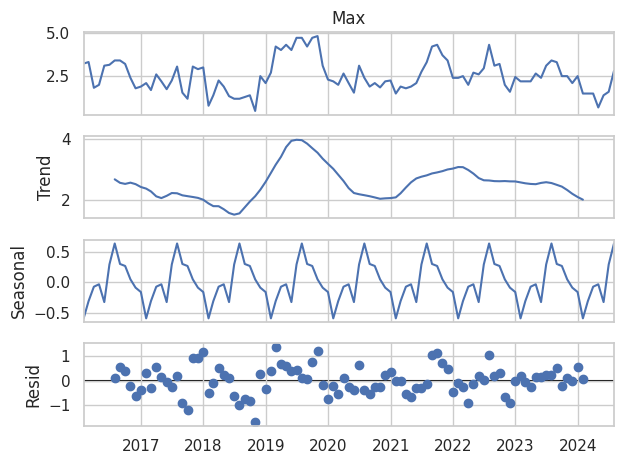

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(monthly_df, model='additive')
decomp.plot()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(p=1, d=0, q=1)(P=1, D=1, Q=1, s=12)
model = SARIMAX(monthly_df,
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())



                                     SARIMAX Results                                      
Dep. Variable:                                Max   No. Observations:                  103
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 -82.658
Date:                            Thu, 10 Apr 2025   AIC                            175.316
Time:                                    21:25:29   BIC                            187.035
Sample:                                01-31-2016   HQIC                           180.003
                                     - 07-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8040      0.080     10.076      0.000       0.648       0.960
ma.L1         -0.1252      0.133   

AIC = 175.31
> Lower AIC is better, and this looks pretty solid for 103 obs.

ar.L1 (0.804)
> Strong autoregressive effect: current value influenced by the previous one.

ma.L1 (-0.125)
> Not significant (p=0.345), maybe could be dropped in future tuning.

Seasonal terms significant:

> ar.S.L12 = -0.401, ma.S.L12 = -0.617
>> captures yearly seasonality, and both are significant (p < 0.01).

> sigma² = 0.467
>> Variance of residuals.

📊 Model checks (at bottom):

> Ljung-Box p = 0.92
>> No autocorrelation left in residuals ✅

> Jarque-Bera p = 0.37
>> Residuals look kinda normal ✅

>Heteroskedasticity p = 0.06
>> Might be slightly heteroskedastic, but not a dealbreaker.

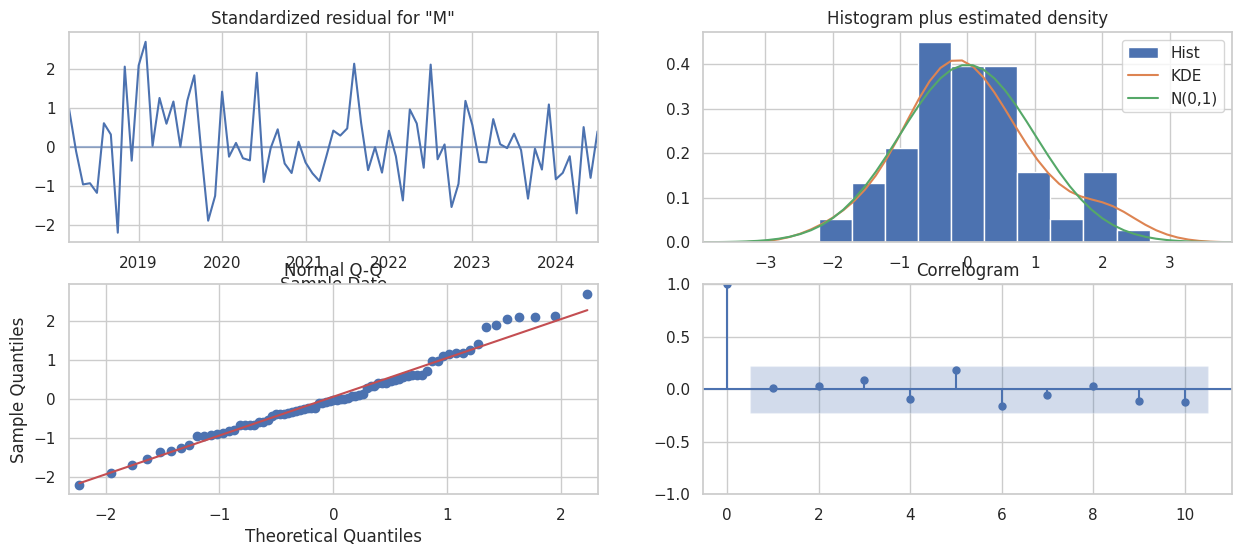

In [ ]:
results.plot_diagnostics(figsize=(15, 6))
plt.show()

Why:

> Shows where lead contamination is expected to go.

> Helps city officials or planners prepare for dangerous periods.

> Highlights specific spikes that may need policy investigation or repair work.

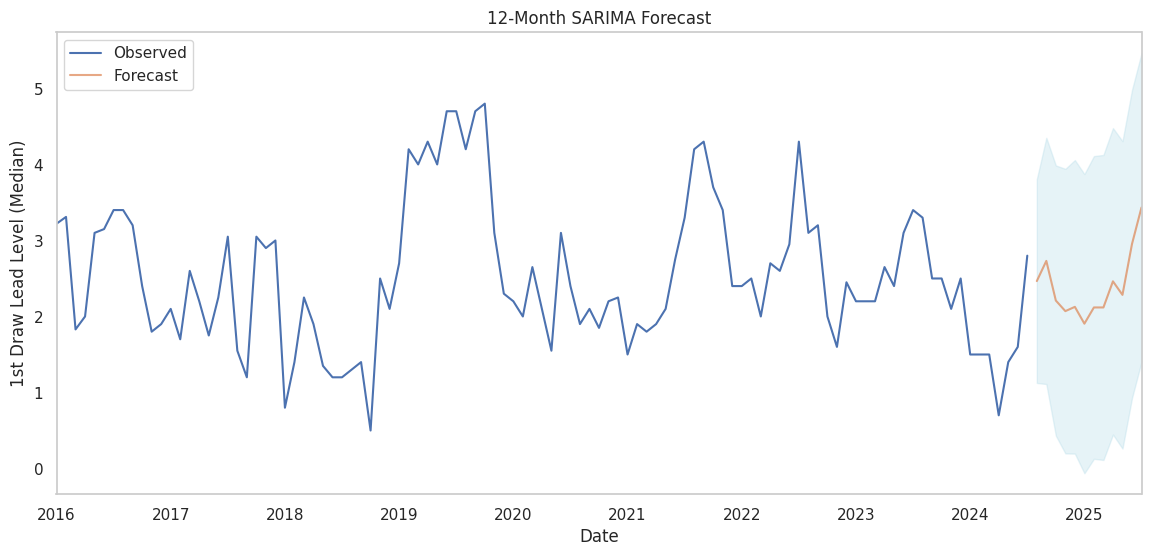

In [ ]:
pred = results.get_forecast(steps=12)
pred_ci = pred.conf_int()

ax = monthly_df.plot(label='Observed', figsize=(14, 6))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='lightblue', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('1st Draw Lead Level (Median)')
plt.legend()
plt.title("12-Month SARIMA Forecast")
plt.grid()
plt.show()

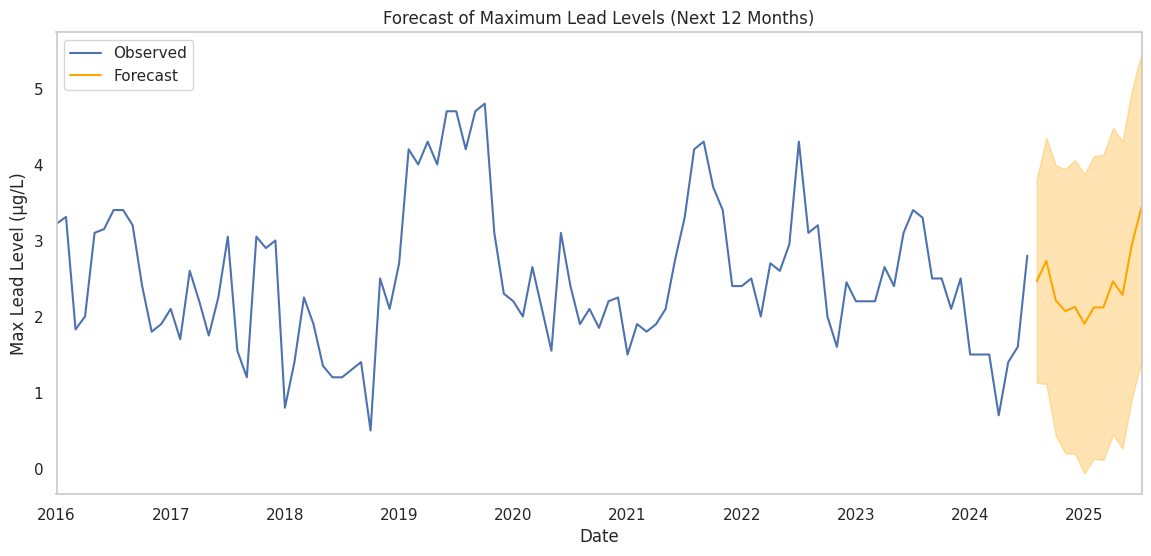

In [ ]:
monthly_max = monthly_df.copy()
monthly_max.name = 'Max'  # Ensure it has a name, useful for legend

forecast = results.get_forecast(steps=12)
ci = forecast.conf_int()

# Plot original and forecast
ax = monthly_max.plot(label='Observed', figsize=(14, 6))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='orange')
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='orange', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Max Lead Level (µg/L)')
ax.set_title('Forecast of Maximum Lead Levels (Next 12 Months)')
# plt.axvline(pd.to_datetime('2023-09-30'), color='red', linestyle='--', label='Sep Anomaly')
# plt.axvline(pd.to_datetime('2023-11-30'), color='purple', linestyle='--', label='Nov Anomaly')
plt.legend()
plt.grid()
plt.show()


Average 'Max' lead levels:

> Cold: ~7.37 µg/L  
> Warm: ~11.1 µg/L → significantly higher!

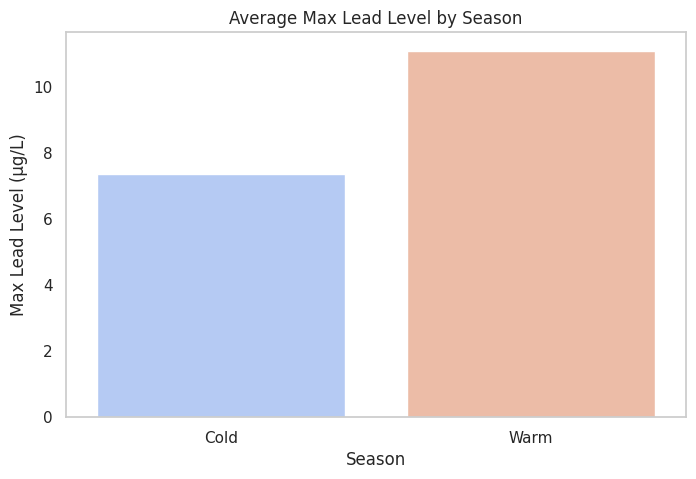

In [ ]:
seasonal_avg = pd.DataFrame({
    'Season': ['Cold', 'Warm'],
    'Max': [7.366690, 11.101686]
})


import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_avg, x='Season', y='Max', palette='coolwarm')
plt.title('Average Max Lead Level by Season')
plt.ylabel('Max Lead Level (µg/L)')
plt.grid(axis='y')
plt.show()


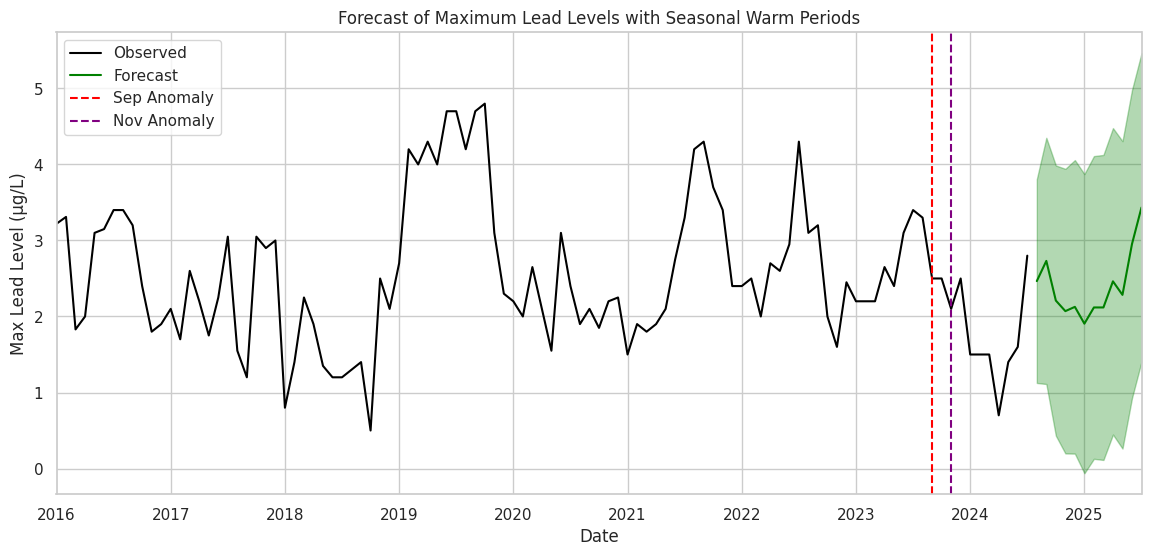

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# Plot warm season bands
for year in range(2016, 2025):
    ax.axvspan(pd.to_datetime(f'{year}-05-01'), pd.to_datetime(f'{year}-09-30'),
               color='orange', alpha=0.1)

# Plot time series and forecast
monthly_df.plot(ax=ax, label='Observed', color='black')
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='green')
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='green', alpha=0.3)

# Highlight zmnea anomalies
ax.axvline(pd.to_datetime('2023-09-30'), color='red', linestyle='--', label='Sep Anomaly')
ax.axvline(pd.to_datetime('2023-11-30'), color='purple', linestyle='--', label='Nov Anomaly')

# Labels, legend, and grid
ax.set_xlabel('Date')
ax.set_ylabel('Max Lead Level (µg/L)')
ax.set_title('Forecast of Maximum Lead Levels with Seasonal Warm Periods')
ax.legend()
ax.grid(True)

plt.show()


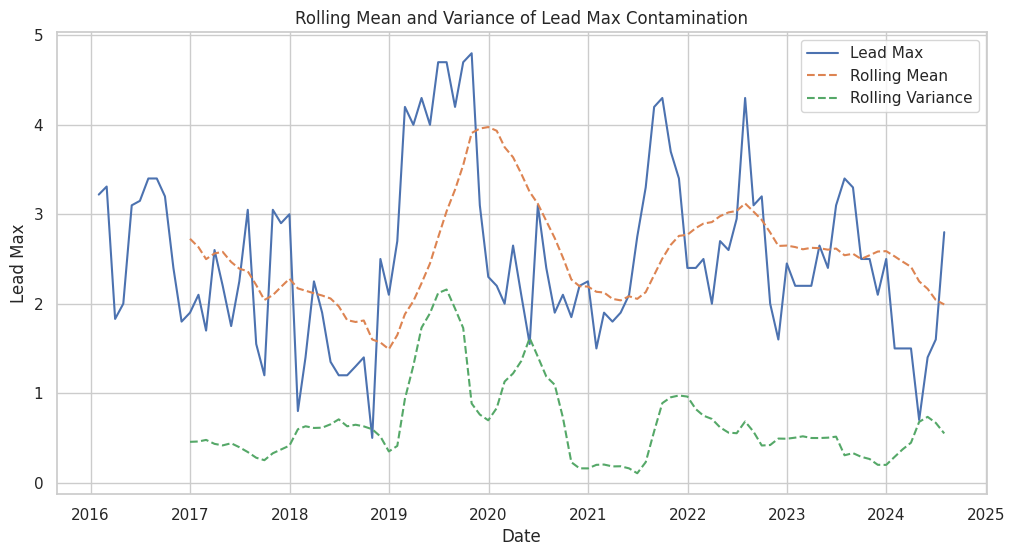

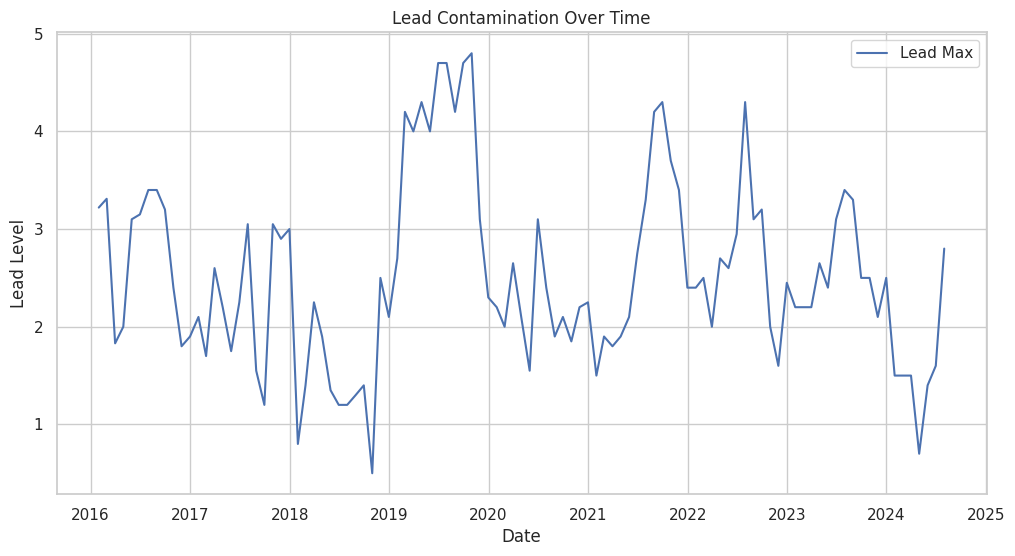

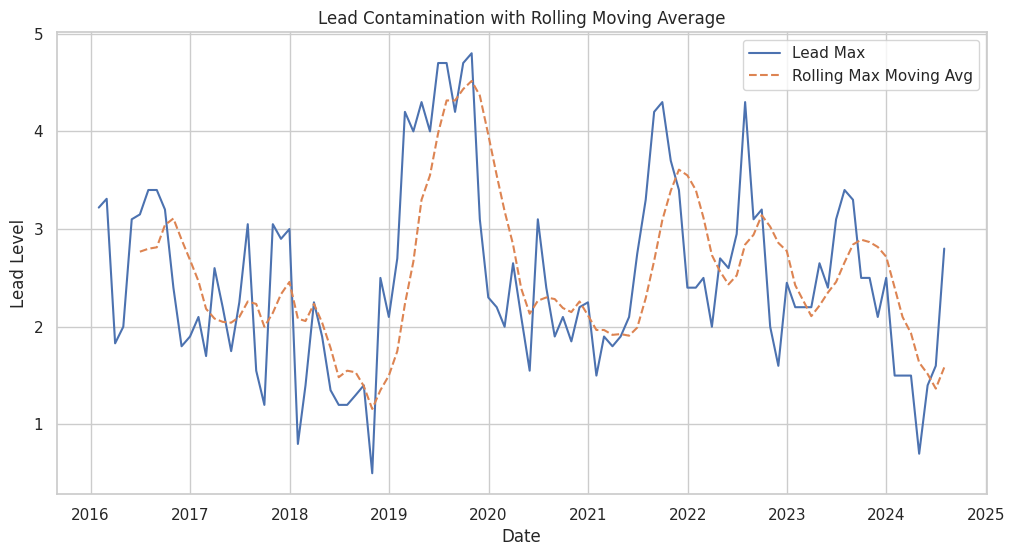

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming monthly_df is already created with 'lead_max' as the column for the maximum lead level

# Plot rolling mean and variance
monthly_df = monthly_df.dropna()  # Drop rows with NaN values (no need for 'subset' argument)

rolling_mean = monthly_df.rolling(window=12).mean()
rolling_variance = monthly_df.rolling(window=12).var()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.plot(monthly_df.index, rolling_mean, label='Rolling Mean', linestyle='--')
plt.plot(monthly_df.index, rolling_variance, label='Rolling Variance', linestyle='--')
plt.legend()
plt.title('Rolling Mean and Variance of Lead Max Contamination')
plt.xlabel('Date')
plt.ylabel('Lead Max')
plt.show()

# Plot Max Lead Contamination over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.title('Lead Contamination Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()

# Add moving averages to the trend plot
rolling_max = monthly_df.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.plot(monthly_df.index, rolling_max, label='Rolling Max Moving Avg', linestyle='--')
plt.title('Lead Contamination with Rolling Moving Average')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()